In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("/kaggle/input/ai-201-b-ese-ai-b/train.csv")
train

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,extra_activities,study_method,math_score,science_score,english_score,overall_score,final_grade
0,17.000000,other,public,phd,4.6,51.0,yes,NaN,notes,43.5,48.0,70.6,50.2,e
1,16.000000,other,public,high school,1.1,93.3,NaN,no,online videos,NaN,45.9,51.1,38.5,f
2,14.000000,female,public,no formal,2.7,87.1,yes,NaN,online videos,NaN,48.8,53.8,46.9,e
3,16.000000,other,private,graduate,4.6,69.6,yes,yes,NaN,50.3,49.0,61.7,61.6,NaN
4,5.758603,female,public,high school,NaN,89.1,yes,NaN,NaN,49.8,52.2,NaN,62.9,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12147,NaN,male,public,graduate,3.9,50.8,no,yes,online videos,NaN,64.7,58.4,59.6,d
12148,17.000000,female,private,diploma,4.7,87.2,yes,yes,mixed,83.1,82.0,83.2,81.3,c
12149,14.000000,female,private,phd,NaN,54.6,yes,yes,online videos,70.0,67.1,70.5,67.4,NaN
12150,19.000000,male,private,phd,5.1,72.6,yes,yes,mixed,52.5,47.8,NaN,62.1,d


In [3]:
train.drop_duplicates(inplace=True)

In [4]:
train.isnull().sum()

age                       918
gender                   1523
school_type              1293
parent_education         1153
study_hours               688
attendance_percentage     688
internet_access           585
extra_activities         1434
study_method             1156
math_score               1268
science_score             546
english_score            1543
overall_score            1399
final_grade               747
dtype: int64

In [5]:
num_col = train.select_dtypes(include = ['int64', 'float64']).columns
num_col

cat_col = train.select_dtypes(include=['object']).columns
cat_col = cat_col[:-1]
cat_col

Index(['gender', 'school_type', 'parent_education', 'internet_access',
       'extra_activities', 'study_method'],
      dtype='object')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

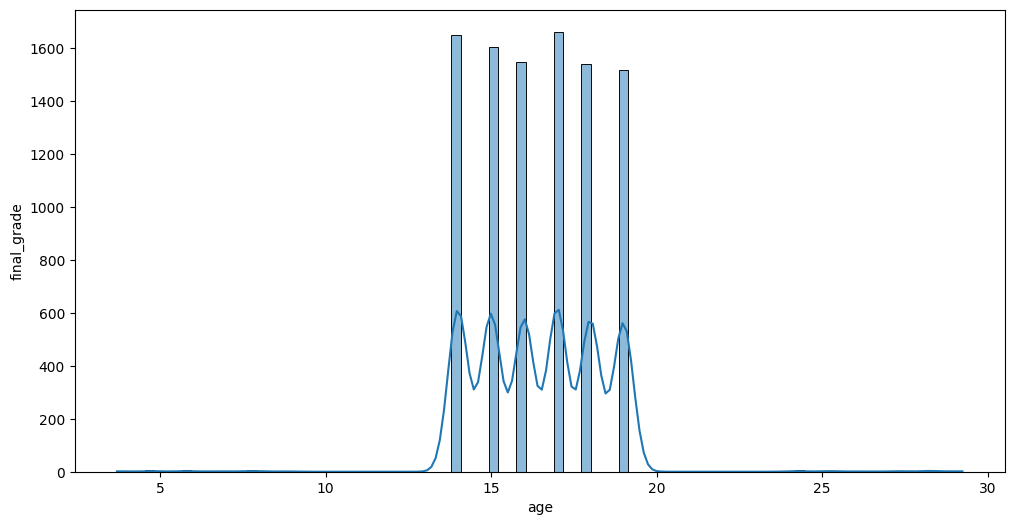

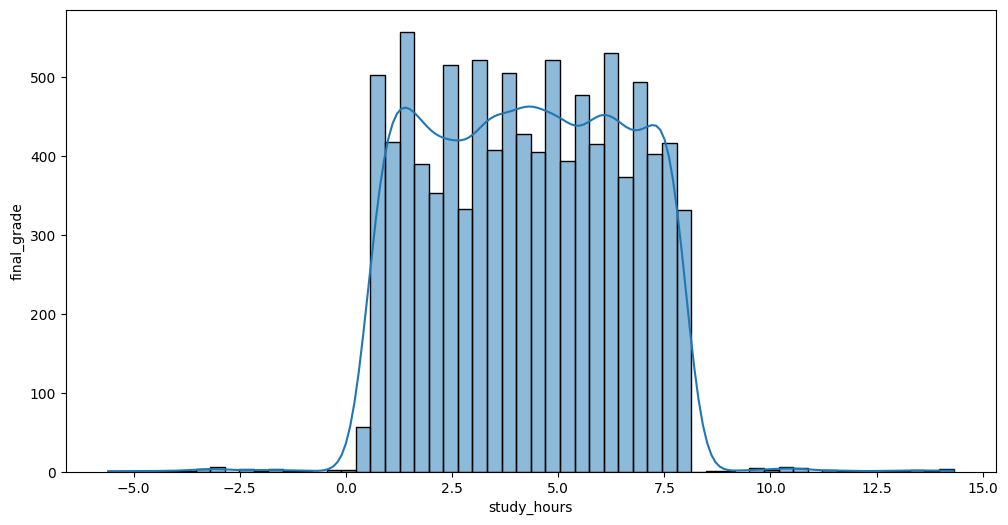

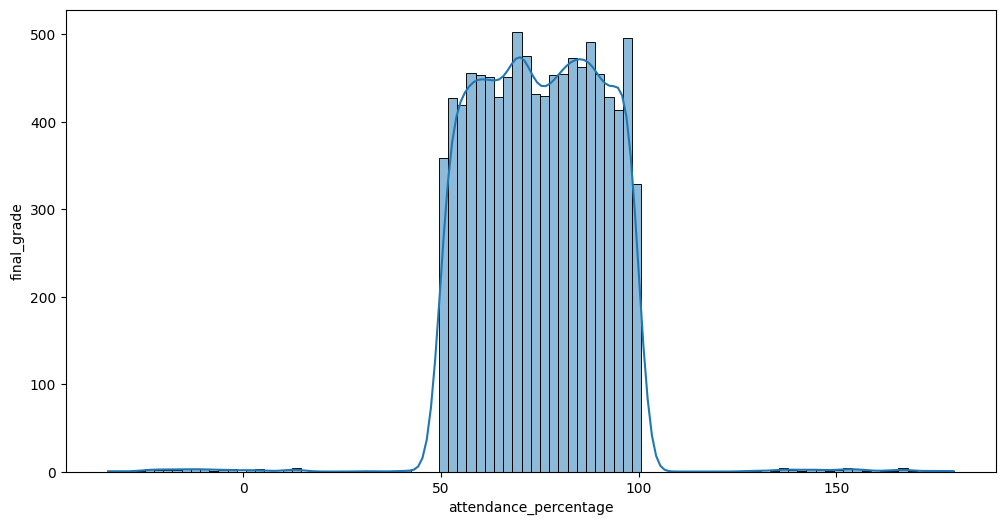

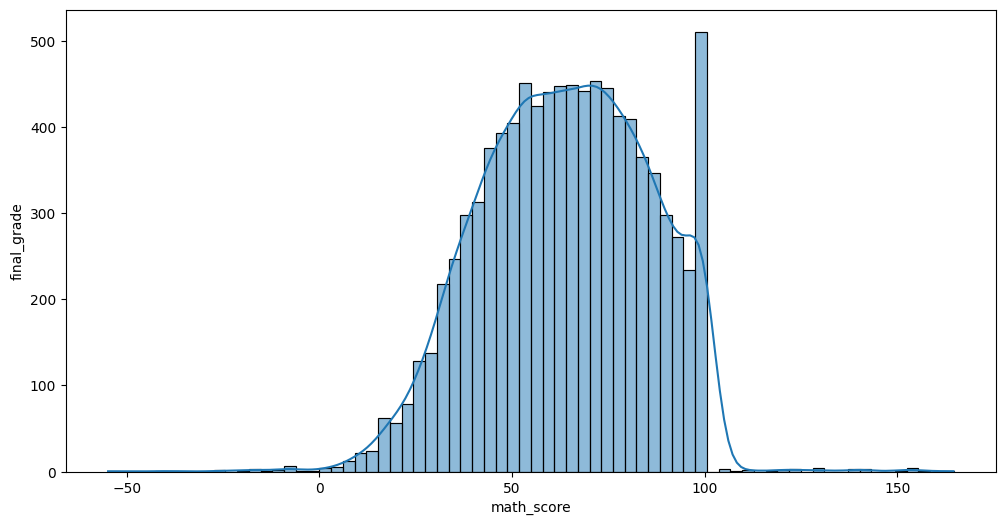

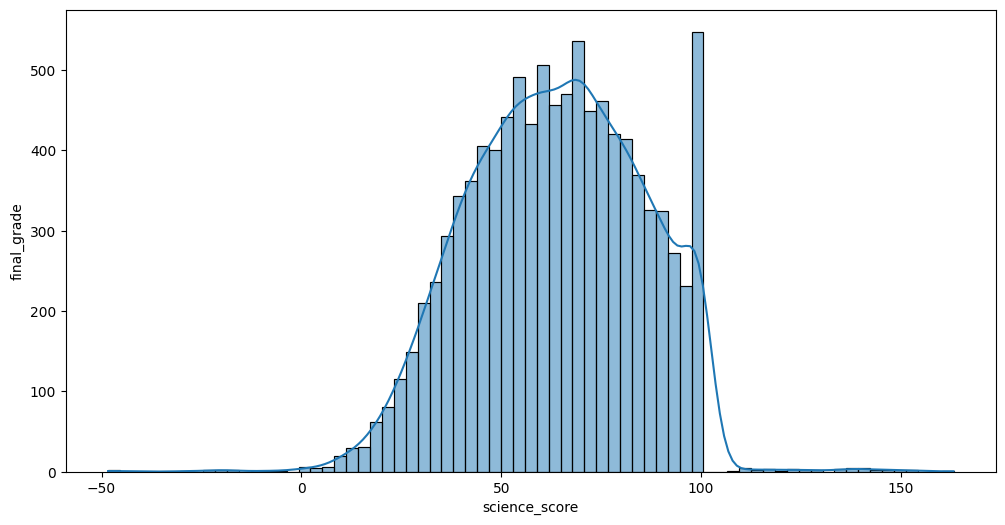

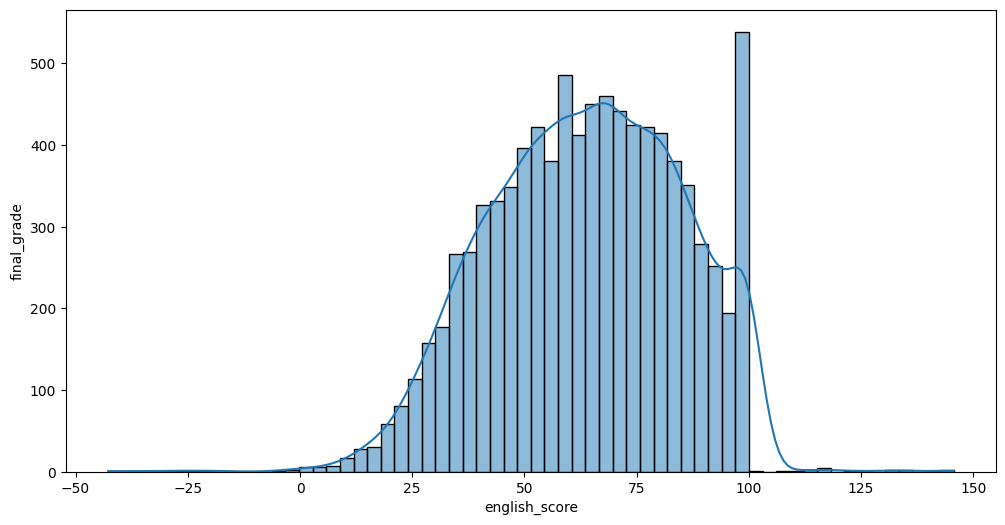

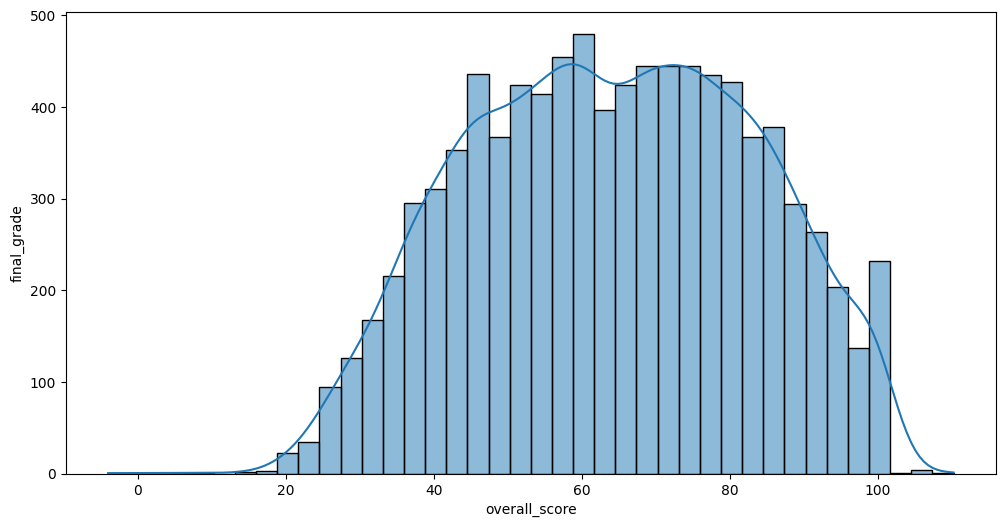

In [6]:
for col in num_col:
    plt.figure(figsize=(12, 6))
    sns.histplot(x=col, data=train, kde=True)
    plt.xlabel(col)
    plt.ylabel("final_grade")
    plt.show

<Axes: xlabel='final_grade', ylabel='count'>

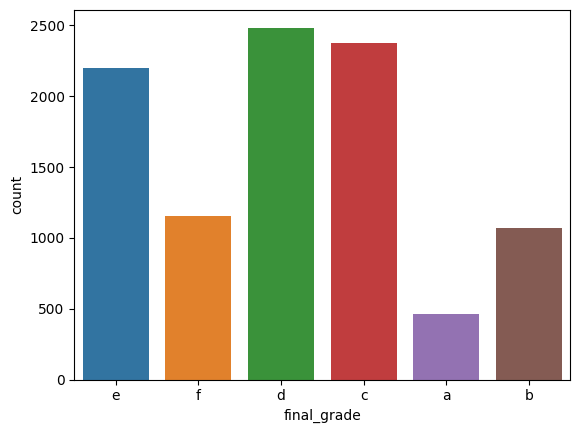

In [7]:
sns.countplot(x='final_grade', data=train)

In [8]:
for col in num_col:
    median = train[col].median()
    train.fillna({col: median}, inplace=True)
    print(f"missing value in {col} is filled with median: {median}")

for col in cat_col:
    mode = train[col].mode()[0]
    train.fillna({col: mode}, inplace=True)
    print(f"missing value in {col} is filled with mode: {mode}")
    
mode = train["final_grade"].mode()[0]
train.fillna({"final_grade": mode}, inplace=True)
print(f"missing value in final_grade is filled with mode: {mode}")

missing value in age is filled with median: 16.0
missing value in study_hours is filled with median: 4.3
missing value in attendance_percentage is filled with median: 75.1
missing value in math_score is filled with median: 64.4
missing value in science_score is filled with median: 64.1
missing value in english_score is filled with median: 64.6
missing value in overall_score is filled with median: 64.1
missing value in gender is filled with mode: female
missing value in school_type is filled with mode: private
missing value in parent_education is filled with mode: high school
missing value in internet_access is filled with mode: yes
missing value in extra_activities is filled with mode: yes
missing value in study_method is filled with mode: mixed
missing value in final_grade is filled with mode: d


In [9]:
train.isnull().sum()

age                      0
gender                   0
school_type              0
parent_education         0
study_hours              0
attendance_percentage    0
internet_access          0
extra_activities         0
study_method             0
math_score               0
science_score            0
english_score            0
overall_score            0
final_grade              0
dtype: int64

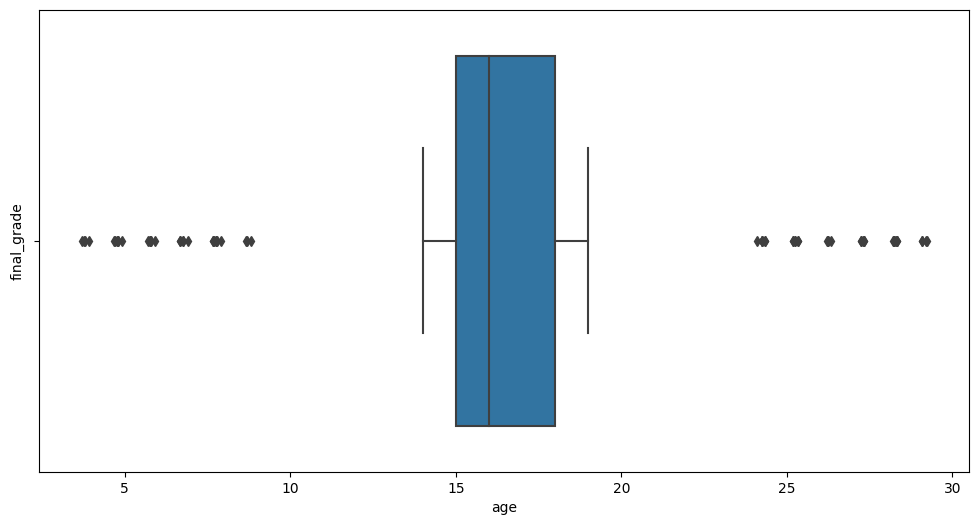

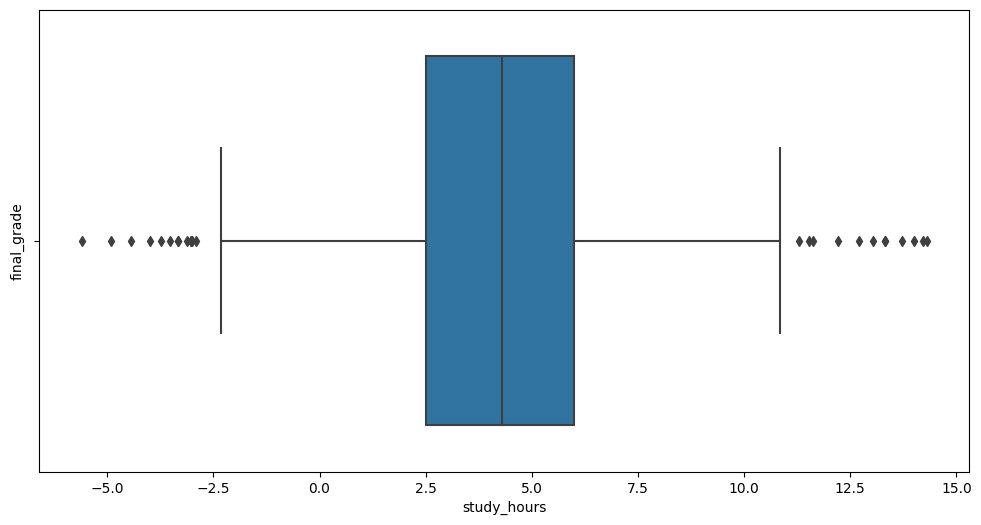

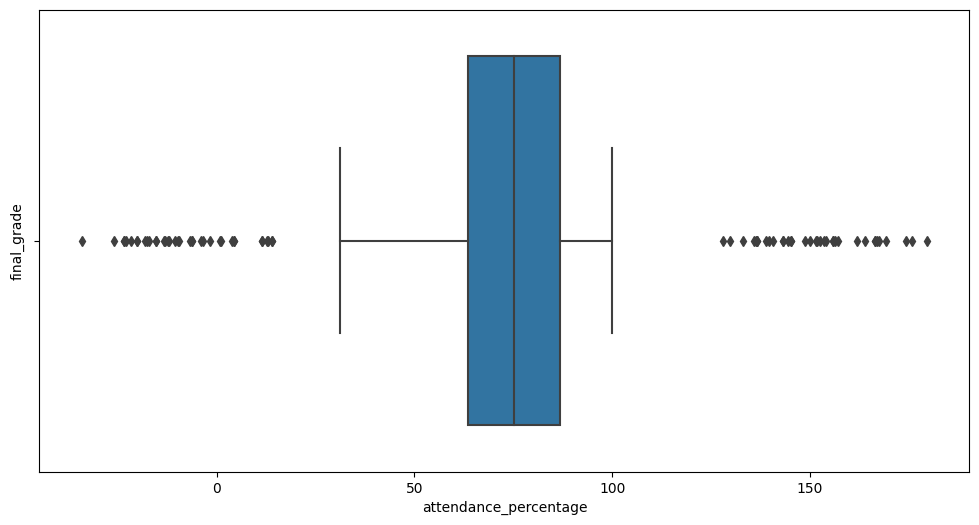

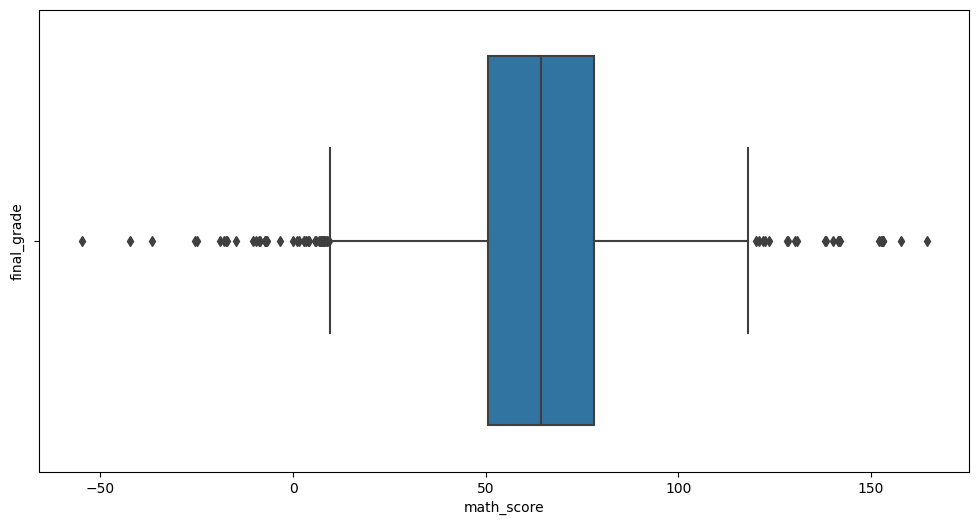

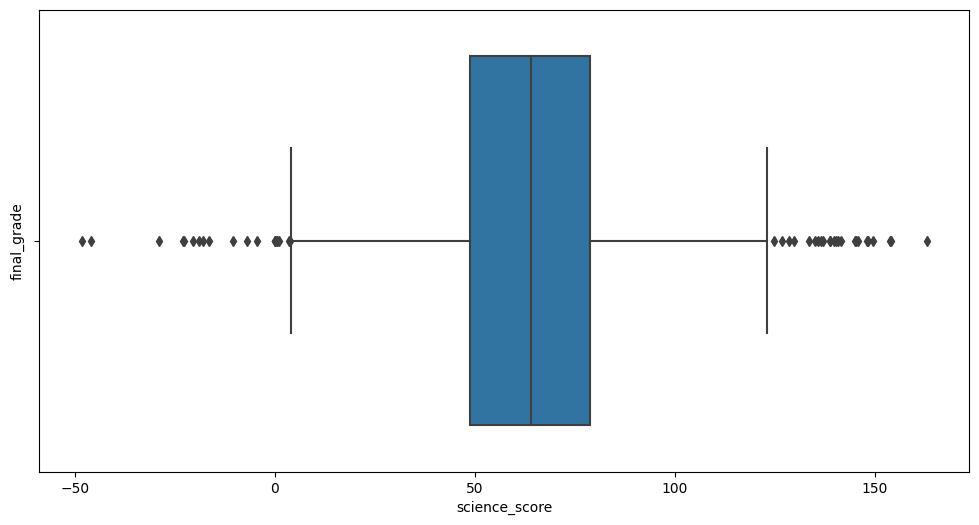

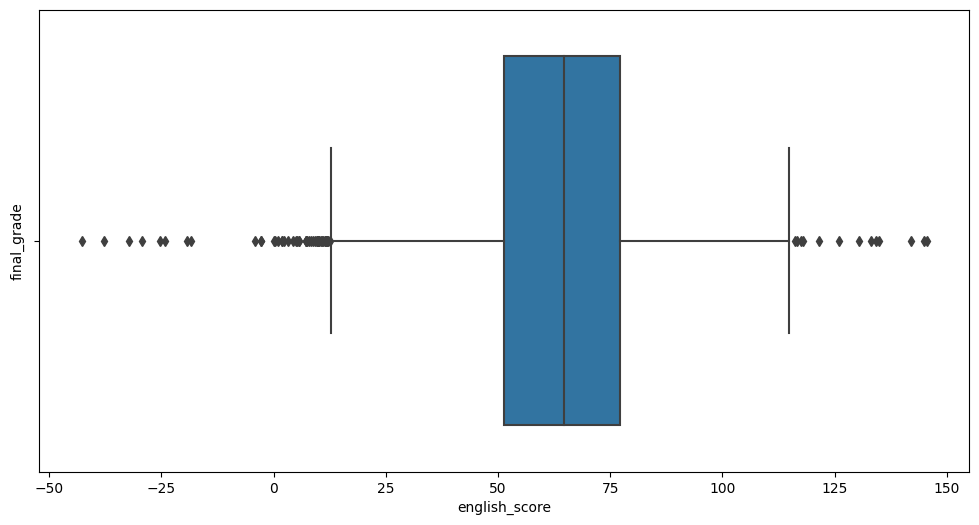

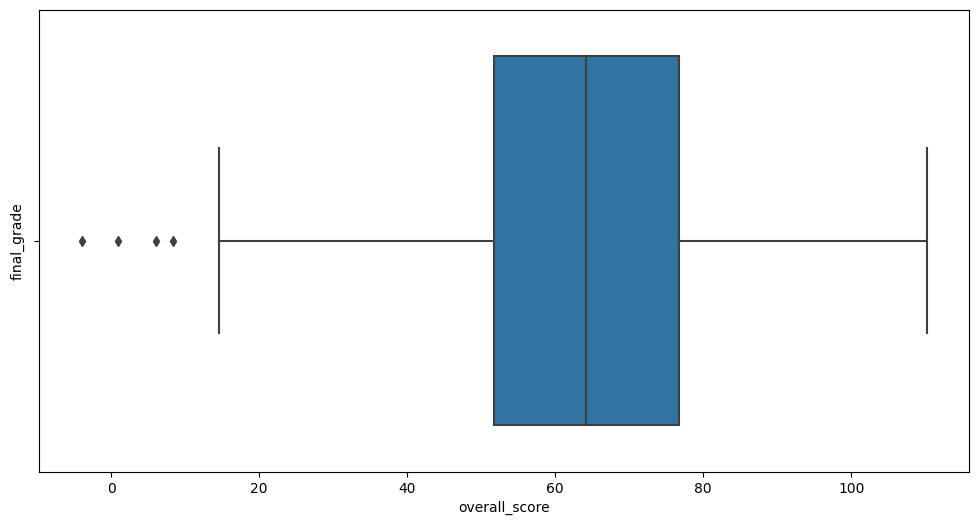

In [10]:
for col in num_col:
    plt.figure(figsize=(12,6))
    sns.boxplot(x=col, data=train)
    plt.xlabel(col)
    plt.ylabel("final_grade")
    plt.show()

In [11]:
outlier_count = {}

for col in num_col:
    q1 = train[col].quantile(.25)
    q3 = train[col].quantile(.75)
    iqr = q3-q1

    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr

    outliers = train[(train[col] < lower) | (train[col] > upper)]
    outlier_count[col] = outliers.shape[0]

outlier_count

{'age': 64,
 'study_hours': 26,
 'attendance_percentage': 73,
 'math_score': 64,
 'science_score': 44,
 'english_score': 62,
 'overall_score': 4}

In [12]:
train.shape

(10500, 14)

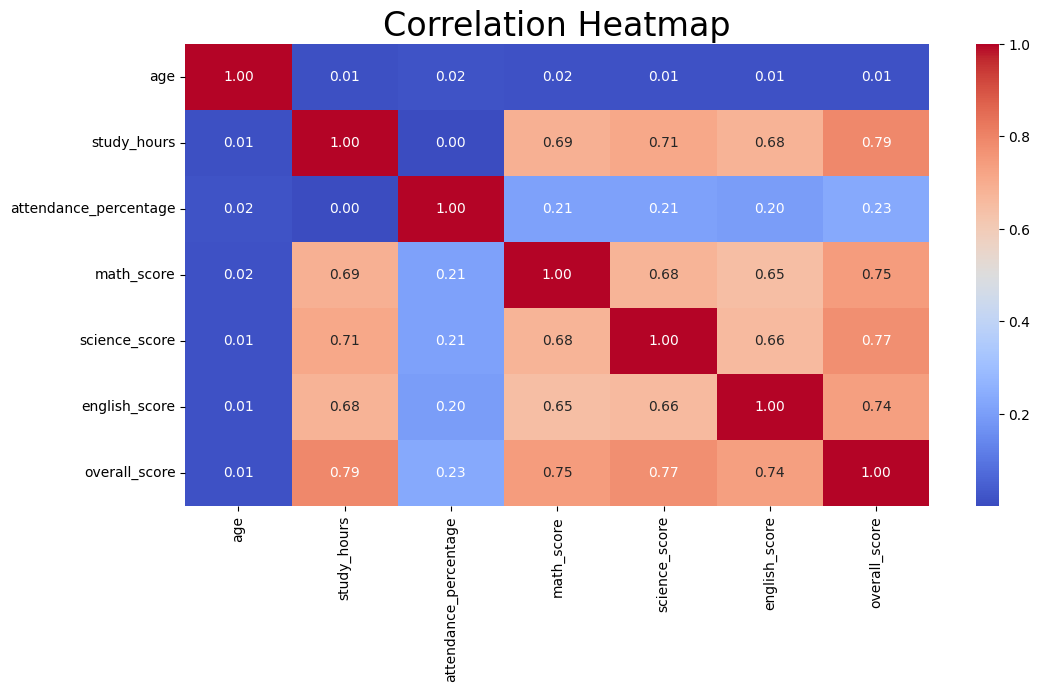

In [13]:
corr = train.corr(numeric_only=True)
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap", fontsize=24)
plt.show()

In [15]:
X = train.iloc[:,:-1]
y = train["final_grade"]

X

,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,extra_activities,study_method,math_score,science_score,english_score,overall_score
0,17.000000,other,public,phd,4.6,51.0,yes,yes,notes,43.5,48.0,70.6,50.2
1,16.000000,other,public,high school,1.1,93.3,yes,no,online videos,64.4,45.9,51.1,38.5
2,14.000000,female,public,no formal,2.7,87.1,yes,yes,online videos,64.4,48.8,53.8,46.9
3,16.000000,other,private,graduate,4.6,69.6,yes,yes,mixed,50.3,49.0,61.7,61.6
4,5.758603,female,public,high school,4.3,89.1,yes,yes,mixed,49.8,52.2,64.6,62.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10495,16.000000,female,private,graduate,0.6,85.5,yes,yes,textbook,12.0,34.6,64.6,29.3
10496,15.000000,other,public,diploma,6.9,91.2,yes,no,group study,100.0,95.4,64.6,100.0
10497,19.000000,female,public,post graduate,3.6,52.1,yes,yes,coaching,64.4,64.1,76.9,57.2
10498,18.000000,male,private,diploma,3.6,75.1,yes,yes,mixed,60.0,59.6,70.5,56.3


In [16]:
y

0        e
1        f
2        e
3        d
4        d
        ..
10495    f
10496    a
10497    d
10498    d
10499    d
Name: final_grade, Length: 10500, dtype: object

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train

,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,extra_activities,study_method,math_score,science_score,english_score,overall_score
3487,18.0,other,public,phd,0.8,51.9,yes,yes,mixed,27.7,3.4,26.0,18.2
3098,16.0,other,public,graduate,4.3,71.3,yes,yes,notes,40.1,63.4,39.4,45.3
6524,18.0,female,public,post graduate,3.0,65.3,yes,yes,notes,50.8,65.7,64.6,47.5
8542,18.0,male,public,graduate,5.0,63.8,yes,yes,textbook,70.8,64.1,78.3,63.2
9075,18.0,male,public,phd,4.3,61.6,yes,yes,online videos,62.3,64.1,64.6,64.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,14.0,male,public,high school,4.2,56.3,yes,yes,online videos,63.5,62.6,59.7,62.3
5191,18.0,female,public,post graduate,6.2,95.2,yes,no,coaching,81.7,82.1,84.1,83.2
5390,16.0,female,public,diploma,4.1,68.0,yes,yes,mixed,44.4,50.1,62.2,51.9
860,14.0,other,private,high school,4.2,84.2,yes,yes,mixed,68.6,81.4,64.6,64.5


In [18]:
X_test

,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,extra_activities,study_method,math_score,science_score,english_score,overall_score
5118,16.000000,female,public,post graduate,6.7,87.3,yes,yes,group study,100.0,100.0,92.9,96.9
8931,19.000000,female,private,graduate,6.9,75.1,yes,no,coaching,95.0,84.6,95.7,91.4
8515,16.000000,female,private,high school,2.2,80.4,yes,yes,notes,52.1,41.8,41.2,49.2
7282,19.000000,male,private,no formal,6.3,75.1,yes,no,group study,80.2,90.3,85.1,78.0
7623,14.000000,other,public,high school,4.3,85.0,yes,yes,online videos,88.9,89.5,76.8,90.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3973,16.000000,female,private,high school,6.5,89.6,yes,no,online videos,95.5,100.0,79.7,93.8
9015,16.000000,female,public,high school,3.4,82.5,yes,no,textbook,60.3,51.5,61.6,64.1
5456,17.000000,male,public,phd,7.8,87.7,yes,no,group study,97.0,100.0,67.8,97.9
678,3.911581,male,public,post graduate,1.0,74.3,no,no,mixed,28.1,30.5,62.4,40.5


In [19]:
y_train

3487    f
3098    e
6524    e
8542    d
9075    d
       ..
5734    d
5191    c
5390    e
860     d
7270    d
Name: final_grade, Length: 7350, dtype: object

In [20]:
y_test

5118    a
8931    b
8515    e
7282    c
7623    b
       ..
3973    b
9015    d
5456    d
678     e
2577    c
Name: final_grade, Length: 3150, dtype: object

In [21]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
ss = StandardScaler()
X_train[num_col] = ss.fit_transform(X_train[num_col])
X_test[num_col] = ss.transform(X_test[num_col])

oe = OrdinalEncoder()
X_train[cat_col] = oe.fit_transform(X_train[cat_col])
X_test[cat_col] = oe.transform(X_test[cat_col])

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [22]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [23]:
XGB = XGBClassifier(eval_metric = "auc", random_state = 42)
param_grid = {
    "n_estimators": [200, 300, 500],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [4, 5, 6]
}

grid_search = GridSearchCV (
    estimator = XGB,
    param_grid = param_grid,
    cv = 2,
    scoring = "roc_auc_ovr",
    n_jobs = -1,
    verbose = 1
)

grid_search.fit(X_train, y_train)
print(f"Best parameter found: {grid_search.best_params_}")
print(f"Best cross validation score: {grid_search.best_score_:.2f}")

model = grid_search.best_estimator_
y_pred_probs = model.predict_proba(X_test)
auc = roc_auc_score(y_test, y_pred_probs, multi_class = 'ovr')
print(f"Test set auc with best model: {auc:.2f}")

Fitting 2 folds for each of 27 candidates, totalling 54 fits
Best parameter found: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500}
Best cross validation score: 0.98
Test set auc with best model: 0.98


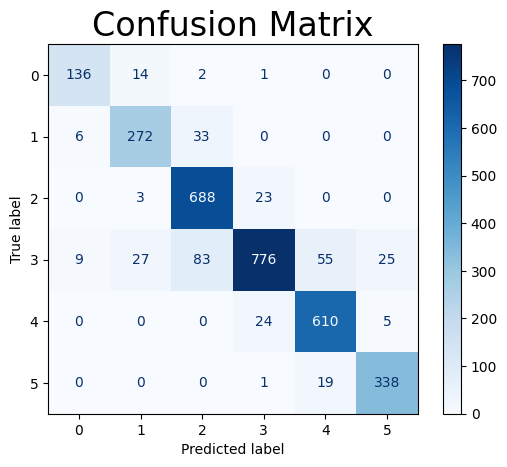

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap = 'Blues')
plt.title("Confusion Matrix", fontsize=24)
plt.show()

In [ ]:
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 2. FPR, TPR aur Thresholds calculate karein
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 3. AUC Score calculate karein (Graph pe likhne ke liye)
auc_score = roc_auc_score(y_test, y_pred_proba)

# 4. Graph Plot karein
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--') # Ye random guess wali line hai

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [26]:
test_df = pd.read_csv("/kaggle/input/ai-201-b-ese-ai-b/test.csv")
test_df

,id,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,extra_activities,study_method,math_score,science_score,english_score,overall_score
0,1,19,male,private,no formal,6.0,55.0,yes,no,notes,63.5,66.8,58.4,68.2
1,2,15,female,private,diploma,0.7,71.1,yes,no,mixed,27.6,30.3,28.1,35.6
2,3,15,female,public,phd,2.2,63.9,yes,yes,textbook,54.7,45.1,55.4,43.7
3,4,14,male,private,phd,3.7,89.0,yes,no,textbook,73.9,70.7,82.9,72.8
4,5,18,other,private,high school,7.3,50.2,yes,yes,coaching,73.7,71.2,84.1,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,4496,16,other,public,diploma,2.3,69.5,yes,yes,online videos,45.9,57.6,55.2,47.3
4496,4497,15,other,private,post graduate,1.7,82.5,yes,no,coaching,36.1,22.3,50.1,39.6
4497,4498,15,female,private,no formal,3.6,52.2,yes,no,notes,60.3,61.2,44.6,49.7
4498,4499,18,other,private,post graduate,7.2,65.0,yes,yes,online videos,83.1,87.6,82.1,91.4


In [27]:
test_id = test_df['id']
test_id

0          1
1          2
2          3
3          4
4          5
        ... 
4495    4496
4496    4497
4497    4498
4498    4499
4499    4500
Name: id, Length: 4500, dtype: int64

In [28]:
test_df.drop('id', axis=1, inplace=True)
test_df

,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,extra_activities,study_method,math_score,science_score,english_score,overall_score
0,19,male,private,no formal,6.0,55.0,yes,no,notes,63.5,66.8,58.4,68.2
1,15,female,private,diploma,0.7,71.1,yes,no,mixed,27.6,30.3,28.1,35.6
2,15,female,public,phd,2.2,63.9,yes,yes,textbook,54.7,45.1,55.4,43.7
3,14,male,private,phd,3.7,89.0,yes,no,textbook,73.9,70.7,82.9,72.8
4,18,other,private,high school,7.3,50.2,yes,yes,coaching,73.7,71.2,84.1,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,16,other,public,diploma,2.3,69.5,yes,yes,online videos,45.9,57.6,55.2,47.3
4496,15,other,private,post graduate,1.7,82.5,yes,no,coaching,36.1,22.3,50.1,39.6
4497,15,female,private,no formal,3.6,52.2,yes,no,notes,60.3,61.2,44.6,49.7
4498,18,other,private,post graduate,7.2,65.0,yes,yes,online videos,83.1,87.6,82.1,91.4


In [29]:
test_df[num_col] = ss.transform(test_df[num_col])
test_df[cat_col] = oe.transform(test_df[cat_col])
test_df

,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,extra_activities,study_method,math_score,science_score,english_score,overall_score
0,1.431068,1.0,0.0,3.0,0.805750,-1.312010,1.0,0.0,3.0,-0.017753,0.143427,-0.288151,0.231417
1,-0.782592,0.0,0.0,0.0,-1.667453,-0.265981,1.0,0.0,2.0,-1.787759,-1.595126,-1.838177,-1.613941
2,-0.782592,0.0,1.0,4.0,-0.967490,-0.733771,1.0,1.0,5.0,-0.451626,-0.890178,-0.441619,-1.155432
3,-1.336008,1.0,0.0,4.0,-0.267527,0.896995,1.0,0.0,5.0,0.495007,0.329190,0.965170,0.491804
4,0.877653,2.0,0.0,2.0,1.412385,-1.623870,1.0,1.0,0.0,0.485146,0.353006,1.026557,0.899368
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,-0.229177,2.0,1.0,0.0,-0.920826,-0.369935,1.0,1.0,4.0,-0.885500,-0.294784,-0.451850,-0.951650
4496,-0.782592,2.0,0.0,5.0,-1.200811,0.474685,1.0,0.0,0.0,-1.368677,-1.976179,-0.712746,-1.387517
4497,-0.782592,0.0,0.0,3.0,-0.314191,-1.493928,1.0,0.0,3.0,-0.175525,-0.123310,-0.994104,-0.815795
4498,0.877653,2.0,0.0,5.0,1.365721,-0.662303,1.0,1.0,4.0,0.948602,1.134164,0.924245,1.544677


In [30]:
pred = model.predict(test_df)
pred

array([3, 5, 4, ..., 4, 1, 3])

In [31]:
decoded_pred = le.inverse_transform(pred)
decoded_pred

array(['d', 'f', 'e', ..., 'e', 'b', 'd'], dtype=object)

In [32]:
sub_df = pd.DataFrame({"id": test_id, "final_grade":decoded_pred})
sub_df.set_index('id', inplace=True)
sub_df

,final_grade
id,
1,d
2,f
3,e
4,c
5,c
...,...
4496,e
4497,f
4498,e


In [33]:
sub_df.to_csv("submission.csv")